# Clone detection

## Table of Contents:
1. [Histograms](#hist)
2. [Clone detection workflow and results](#check)
3. [Implementation](#implementation)

## Statistical hypothesis testing

In [456]:
import py.labeled as labeled
import py.statstest as statstest
importlib.reload(statstest)

<module 'py.statstest' from '/home/mschen/code/nbooks/py/statstest.py'>

In [464]:
statstest.mw('DISTINCT posts.score, posts.id',
             'labels.slabel=2 OR labels.slabel=6 OR labels.slabel=7',
             'labels.slabel=4',
             )

U= 276845.0
p= 0.21341279697374543


## 1. Histograms<a class="anchor" id="hist"></a>

### Data Summary

We labeled:
2657 clone groups
8690 clone elements
3562 answer posts
3184 question posts
Their distributions are as following:
security: 0=irrelavant, 1=I don't know, 2=secure, 3=somewhat secure, 4=insecure, ,5=mixing,  6=context, 7=no impact
category: 1=SSL, 2=symmetric, 3=asymmetric, 4=hash, 5=random


<IPython.core.display.Javascript object>


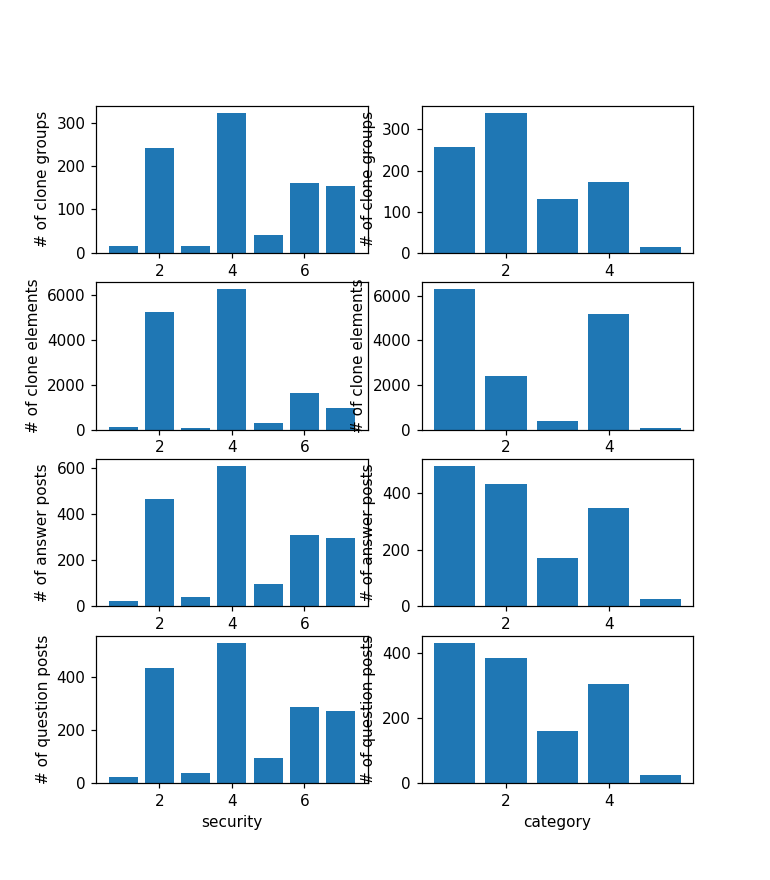

n_slabels: range(1, 8)
n_grps: [17, 242, 17, 323, 41, 162, 155]
n_scategorys: range(1, 6)
n_grps: [257, 341, 131, 172, 14]
n_slabels: range(1, 8)
n_elements: [130, 5230, 76, 6238, 308, 1620, 950]
n_scategorys: range(1, 6)
n_elements: [6282, 2406, 394, 5178, 74]
n_slabels: range(1, 8)
n_answers: [24, 466, 40, 609, 99, 310, 295]
n_scategorys: range(1, 6)
n_answers: [494, 432, 171, 348, 27]
n_slabels: range(1, 8)
n_questions: [24, 434, 37, 530, 95, 287, 274]
n_scategorys: range(1, 6)
n_questions: [432, 386, 161, 304, 24]


In [423]:
labels_summary(slabels=range(1,8))

### View Count

<IPython.core.display.Javascript object>


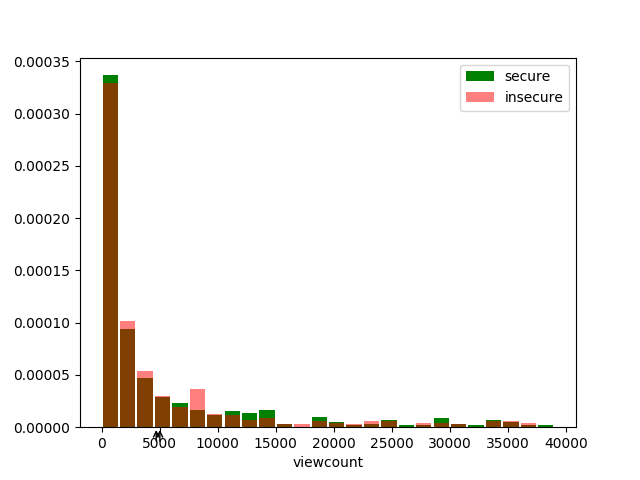

labels.slabel=2: n=396, aver=5024, min=22, max=38287, mid=1473
labels.slabel=4: n=472, aver=4710, min=26, max=37149, mid=1571


In [377]:
ax = plt.gca()
ax.cla()
plot_qattr_hist("viewcount", ax, ['labels.slabel=2', 'labels.slabel=4'], overlap=True, binstat=True,
                bins=range(0, 40000, 1500), stacked=False, density=True, rwidth=0.88,
                color=['green', to_rgba('red',0.5)], label=['secure', 'insecure'])

### Favorite Count

<IPython.core.display.Javascript object>


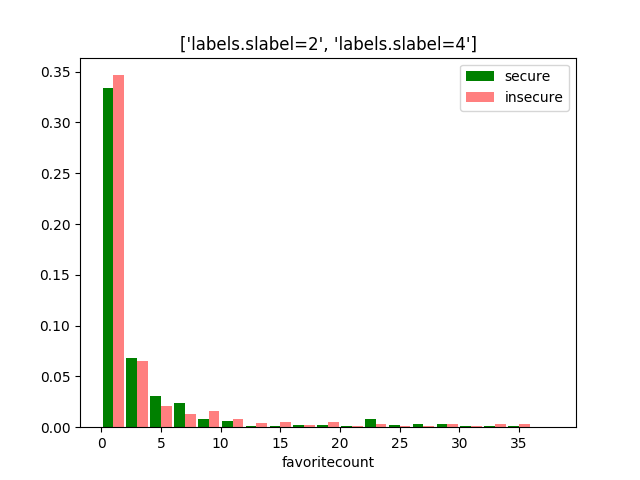

labels.slabel=2: n=421, aver=2, min=0, max=34, mid=1
labels.slabel=4: n=508, aver=2, min=0, max=35, mid=0


In [328]:
ax = plt.gca()
ax.cla()
plot_qattr_hist("favoritecount", ax, ['labels.slabel=2', 'labels.slabel=4'], overlap=False, binstat=True,
                 bins=range(0,40,2),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

### Answer Count

<IPython.core.display.Javascript object>


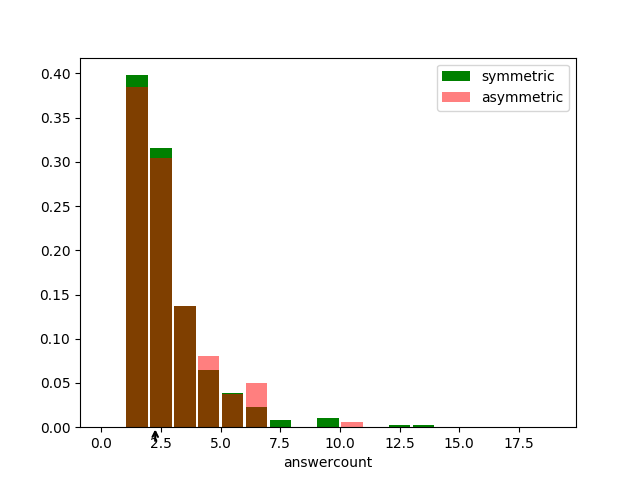

labels.scategory=2: n=387, aver=2, min=1, max=13, mid=2
labels.scategory=3: n=161, aver=2, min=1, max=10, mid=2


In [380]:
ax = plt.gca()
ax.cla()
plot_qattr_hist("answercount", ax, ['labels.scategory=2', 'labels.scategory=3'], overlap=True, binstat=True,
                 bins=range(0,20,1),stacked=False, density=True, label=['symmetric', 'asymmetric'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

### Question Comment Count

<IPython.core.display.Javascript object>


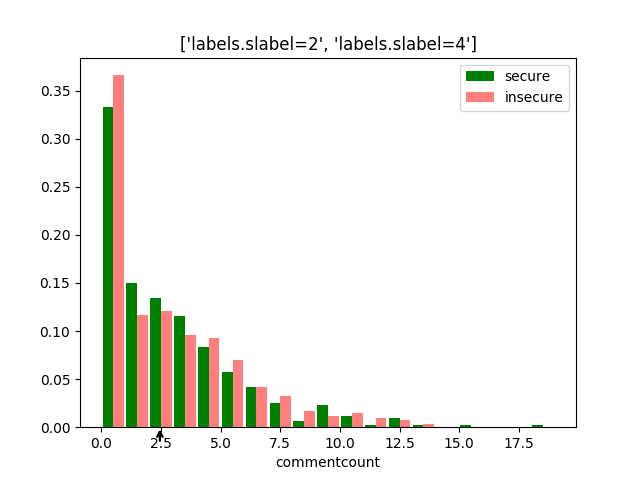

labels.slabel=2: n=433, aver=2, min=0, max=18, mid=2
labels.slabel=4: n=530, aver=2, min=0, max=13, mid=2


In [358]:
ax = plt.gca()
ax.cla()
plot_qattr_hist("commentcount", ax, ['labels.slabel=2', 'labels.slabel=4'], overlap=False, binstat=True,
                 bins=range(0,20,1),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9)

<IPython.core.display.Javascript object>


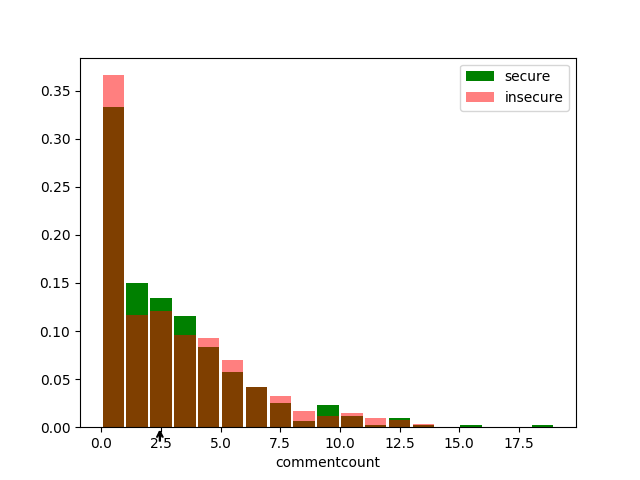

labels.slabel=2: n=433, aver=2, min=0, max=18, mid=2
labels.slabel=4: n=530, aver=2, min=0, max=13, mid=2


In [357]:
ax = plt.gca()
ax.cla()
plot_qattr_hist("commentcount", ax, ['labels.slabel=2', 'labels.slabel=4'], overlap=True, binstat=True,
                 bins=range(0,20,1),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

### User Reputation

<IPython.core.display.Javascript object>


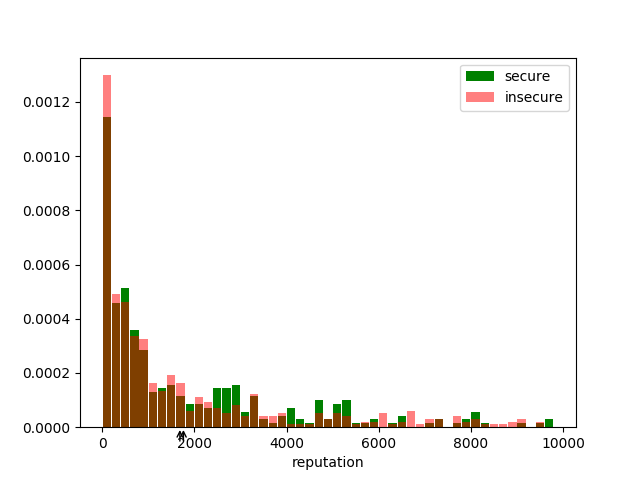

labels.slabel=2: n=350, aver=1764, min=1, max=9662, mid=817
labels.slabel=4: n=489, aver=1687, min=1, max=9584, mid=753


In [365]:
ax = plt.gca()
ax.cla()
plot_uattr_hist("reputation", ax, ['labels.scategory=1','labels.scategory=2','labels.scategory=3'], overlap=True, binstat=True,
                 bins=range(0, 10000, 200),stacked=False, density=True, label=['SSL', 'symmetric'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

### User Views

<IPython.core.display.Javascript object>


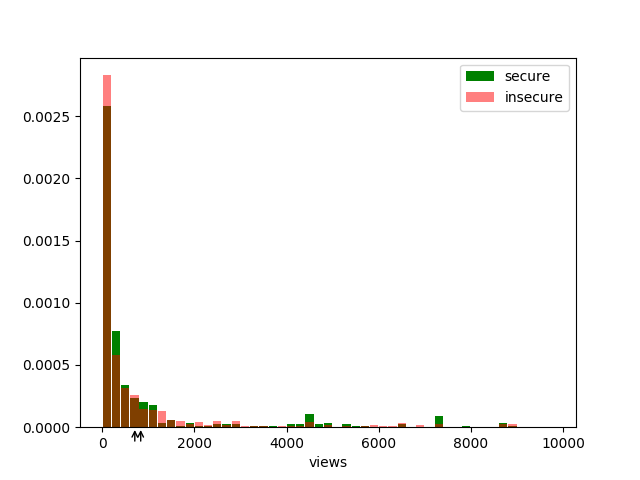

labels.slabel=2: n=428, aver=837, min=0, max=8834, mid=187
labels.slabel=4: n=585, aver=709, min=0, max=8834, mid=141


In [366]:
ax = plt.gca()
ax.cla()
plot_uattr_hist("views", ax, ['labels.slabel=2','labels.slabel=4'], overlap=True, binstat=True,
                 bins=range(0, 10000, 200),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

## User age

<IPython.core.display.Javascript object>


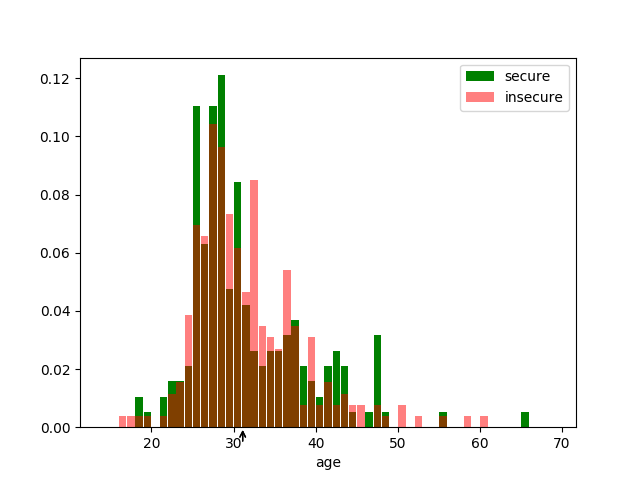

labels.slabel=2: n=190, aver=31, min=18, max=65, mid=29
labels.slabel=4: n=259, aver=31, min=16, max=60, mid=30


In [370]:
ax = plt.gca()
ax.cla()
plot_uattr_hist("age", ax, ['labels.slabel=2','labels.slabel=4'], overlap=True, binstat=True,
                 bins=range(14, 70, 1),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

### User Upvotes

<IPython.core.display.Javascript object>


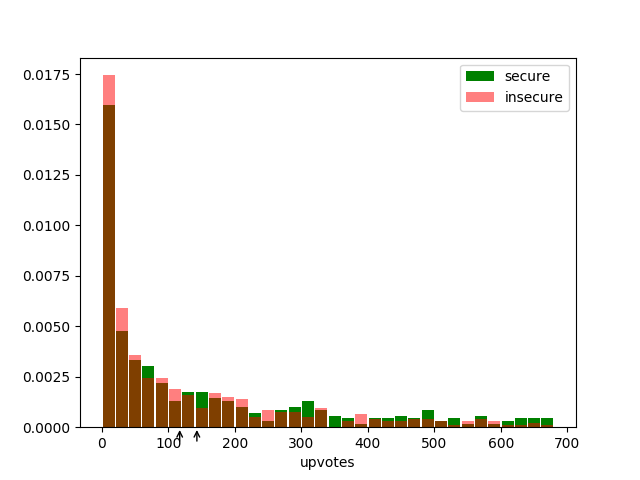

labels.slabel=2: n=345, aver=142, min=0, max=667, mid=64
labels.slabel=4: n=473, aver=117, min=0, max=679, mid=46


In [373]:
ax = plt.gca()
ax.cla()
plot_uattr_hist("upvotes", ax, ['labels.slabel=2','labels.slabel=4'], overlap=True, binstat=True,
                 bins=range(0, 700, 20),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

### User Downvotes

<IPython.core.display.Javascript object>


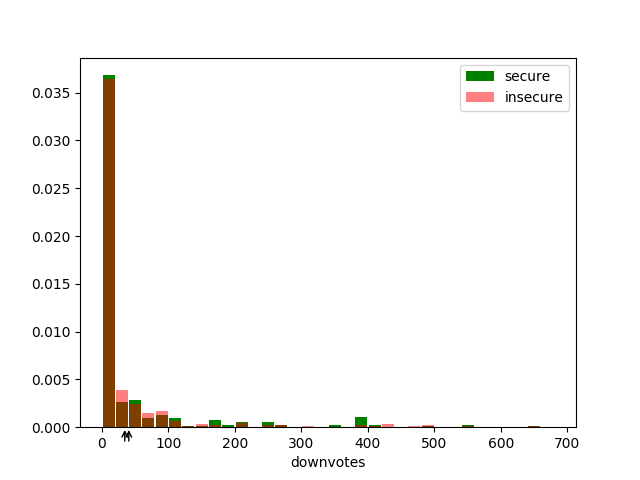

labels.slabel=2: n=406, aver=40, min=0, max=651, mid=5
labels.slabel=4: n=573, aver=34, min=0, max=643, mid=4


In [374]:
ax = plt.gca()
ax.cla()
plot_uattr_hist("downvotes", ax, ['labels.slabel=2','labels.slabel=4'], overlap=True, binstat=True,
                 bins=range(0, 700, 20),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

## ratio: clone length / snippet length

<IPython.core.display.Javascript object>


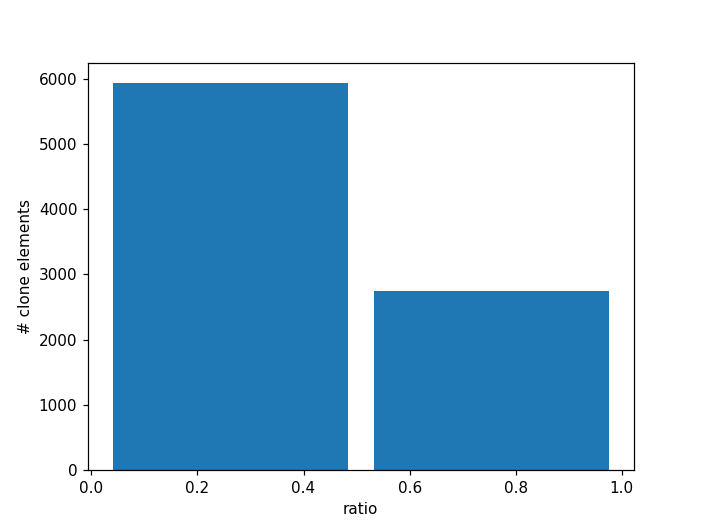

In [419]:
ax = plt.gca()
plot_length_ratio_hist(ax, bins=2, rwidth=0.9, density=False)

## 2. Clone detection workflow and results <a class="anchor" id="check"></a>

In the following function call, the script [implemented](#implementation) at the end of this file will run the entire clone detection workflow, including:

1. Export snippets from database to java files
2. Run CCFinder with specified options on those java files
3. Parse the CCFinder result file (.ccfxd) into database
4. Update the database with more information (eg. line number) from proprocessed files generated by CCFinder


As the first step, we run the entire clone detection process on the first 5,000 snipeets of the in total 25,855 extracted snippets.

In [ ]:
snippet_dname = 'all'
#snippet_id_range = (0,5000)
snippet_id_range = (0,50000000)
ccf_opt = ''
detect_clones(snippet_dname, ccf_opt, snippet_id_range, connect_str=connect_str)

We are then able to exam a lot of things by issuing query on the database. For example, in the following, we want to check each clones in a clone group. In this "5k" case, there are 356 clone groups. Below, we print out all elements in each clone group for some of the clone groups. A clone group is identified by clone id (cid).

Next, we will compute precision, recall, etc. by manually examing the following result. And then run the entire process on all the snippets.

By the way, scanning throught the following output, I did find the "overlap" case you mentioned (eg. for cid=1294)

In [ ]:
for cid in [917, 1489, 1294, 2867, 608, 576]:
    specific_group_check(cid=cid, tb_name_suffix='5k', connect_str=connect_str)

In [ ]:
tb_name_suffix = '5k'
with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql_create = 'CREATE TABLE %s();'

## Implementation <a class="anchor" id="implementation"></a>

In [2]:
from IPython.display import Markdown, display
import psycopg2
import numpy as np
import pandas as pd
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import os
import time
from statistics import *
from matplotlib.colors import to_rgba

/home/mschen/code/nbooks/venv3/lib/python3.5/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
connect_str = "dbname='stackoverflow' user='extractor' host='localhost' " + \
              "password='extractor'"

In [4]:
def codeprint(code):
    display(Markdown("""
```java
%s
```
""" % (code)))
    
def export_as_java(start_id, end_id, snippet_dpath):
    '''export from database to java files for id within range [start_id, end_id)'''
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        cursor.execute("""SELECT postid, indx, code FROM snippets WHERE id >= %d AND id < %d;""" % (start_id, end_id))
        rows = cursor.fetchall()
        for row in rows:
            fname = '%d_%d.java' % (row[0], row[1])
            if not os.path.isdir(snippet_dpath):
                os.makedirs(snippet_dpath)
            fpath = os.path.join(snippet_dpath,fname)
            with open(fpath, 'w') as f:
                f.write(row[-1])
        print(len(rows), "snippets exported to", snippet_dpath)

### process .ccfxd file

In [5]:
def get_prepro_suffix(ccfxd_txt_fpath):
    with open(ccfxd_txt_fpath) as f:
        for line in f:
            if "option: -preprocessed_file_postfix" in line:
                return line.split()[-1]

def sql_4ccfxd_file_block(line, tb_name, fid_postid):
    '''prepare SQL for ccfxd file block'''
    file_info = line.split()
    fid = file_info[0]
    fname = "".join(file_info[1].split('/')[-1].split('.')[:-1])
    postid, indx = fname.split('_')
    fid_postid[fid] = (postid, indx) 
    length = file_info[2]
    sql = """INSERT INTO %s(fid, postid, indx, length)
VALUES(%s, %s, %s, %s) ON CONFLICT DO NOTHING;""" % (tb_name,
    fid, postid, indx, length)
    return sql

def sql_4ccfxd_pair_block(line, tb_name, fid_postid):
    '''prepare SQL for ccfxd clone pair block'''
    clone_pair = line.split()
    pid = ":".join(clone_pair[1:])  # unique pair id
    cid = clone_pair[0]
    clone0 = clone_pair[1].split(".")
    fid0 = clone0[0]
    tmp = clone0[1].split("-")
    tbegin0 = tmp[0]
    tend0 = tmp[1]
    clone1 = clone_pair[2].split(".")
    fid1 = clone1[0]
    tmp = clone1[1].split("-")
    tbegin1 = tmp[0]
    tend1 = tmp[1]
    sql = """INSERT INTO %s(pid, cid,
postid0, indx0, tbegin0, tend0,
postid1, indx1, tbegin1, tend1
) VALUES ($aesc6$%s$aesc6$, %s,
%s, %s, %s, %s,
%s, %s, %s, %s) ON CONFLICT DO NOTHING;""" % (tb_name, pid, cid,
    fid_postid[fid0][0], fid_postid[fid0][1], tbegin0, tend0,
    fid_postid[fid1][0], fid_postid[fid1][1], tbegin1, tend1)
    return sql

def ccfxd2db(ccfxd_txt_fpath, connect_str):
    '''dump .ccfxd file to postgresql database'''
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        tb_name_suffix = "".join(os.path.basename(ccfxd_txt_fpath).split(".")[:-1])
        file_tb_name = "source_files_%s" % (tb_name_suffix)
        pair_tb_name = "clone_pairs_%s" % (tb_name_suffix)
        sql_create = """CREATE TABLE IF NOT EXISTS %s(
fid INT,
postid INT,
indx INT,
length INT,
PRIMARY KEY (fid),
FOREIGN KEY (postid, indx) REFERENCES snippets(postid, indx)
);
""" % (file_tb_name)
        cursor.execute(sql_create)
        
        sql_create = """CREATE TABLE IF NOT EXISTS %s(
pid VARCHAR(64), 
cid INT,
postid0 INT,
indx0 INT,
tbegin0 INT,
tend0 INT,
lbegin0 INT,
lend0 INT,
code0 VARCHAR(24060),
postid1 INT,
indx1 INT,
tbegin1 INT,
tend1 INT,
lbegin1 INT,
lend1 INT,
code1 VARCHAR(24060),
PRIMARY KEY (pid)
); 
""" % (pair_tb_name)
        cursor.execute(sql_create)
                
        fid_postid = {}
        with open(ccfxd_txt_fpath) as f:
            parsing_fid = False
            parsing_cid = False
            for line in f:
                if line == 'source_files {\n':
                    parsing_fid = True
                    continue
                if parsing_fid:
                    if line == '}\n':
                        parsing_fid = False
                        continue
                    sql = sql_4ccfxd_file_block(line, file_tb_name, fid_postid)
                    cursor.execute(sql)

                if line == 'clone_pairs {\n':
                    parsing_cid = True
                    continue
                if parsing_cid:
                    if line == '}\n':
                        parsing_cid = False
                        continue
                    sql = sql_4ccfxd_pair_block(line, pair_tb_name, fid_postid)
                    cursor.execute(sql)
    print("Done:", ccfxd_txt_fpath,"written to", file_tb_name, "and", pair_tb_name)


########## process intermediate file

def itoken2iline(itokens, prepro_fpath):
    '''convert token index to line index, both are 0 based'''
    ilines = []
    with open(prepro_fpath) as f:
        for i, line in enumerate(f):
            if i in itokens:
                iline = int(line.split('.')[0],16)-1
                ilines.append(iline)
    return itokens.__class__(ilines)



def update_clone_pair_db(snippet_dpath, connect_str,
                         prepro_suffix='.java.2_0_0_0.default.ccfxprep',
                         prepro_dname = '.ccfxprepdir/'):
    with psycopg2.connect(connect_str) as conn:
        tb_name_suffix = os.path.basename(snippet_dpath)
        file_tb_name = "source_files_%s" % (tb_name_suffix)
        pair_tb_name = "clone_pairs_%s" % (tb_name_suffix)
        cursor = conn.cursor()
    #   1       2        3         4           5
        sql = """SELECT p.pid,
p.postid0, p.indx0, s0.code, p.tbegin0, p.tend0,
p.postid1, p.indx1, s1.code, p.tbegin1, p.tend1
FROM %s p
INNER JOIN snippets s0
  ON p.postid0 = s0.postid AND p.indx0 = s0.indx
INNER JOIN snippets s1
  ON p.postid1 = s1.postid AND p.indx1 = s1.indx
;""" % (pair_tb_name)
        cursor.execute(sql)
        rows = cursor.fetchall()
        for row in rows:
            snippet0_fname = "%d_%d.java" % (row[1], row[2])
            snippet1_fname = "%d_%d.java" % (row[6], row[7])
            snippet0_url = "http://stackoverflow.com/questions/%d" % (row[1])
            snippet1_url = "http://stackoverflow.com/questions/%d" % (row[6])
            snippet0_fpath = os.path.join(snippet_dpath, snippet0_fname)
            snippet1_fpath = os.path.join(snippet_dpath, snippet1_fname)
            prepro0_fpath = os.path.join(snippet_dpath, prepro_dname, snippet0_fname+prepro_suffix)
            prepro1_fpath = os.path.join(snippet_dpath, prepro_dname, snippet1_fname+prepro_suffix)
            snippet0_trange = row[4:6]
            snippet1_trange = row[9:11]
            if not (os.path.exists(prepro0_fpath) and os.path.exists(prepro1_fpath)):
                continue
            snippet0_lrange = itoken2iline(snippet0_trange, prepro0_fpath)
            snippet1_lrange = itoken2iline(snippet1_trange, prepro1_fpath)
            code0 = row[3].split('\n')
            code1 = row[8].split('\n')
            update_sql = """INSERT INTO %s
(pid, lbegin0, lend0, code0, lbegin1, lend1, code1)
VALUES
($aesc6$%s$aesc6$, %d, %d, $aesc6$%s$aesc6$, %d, %d, $aesc6$%s$aesc6$) ON CONFLICT(pid) DO UPDATE
SET
(lbegin0, lend0, code0, lbegin1, lend1, code1) = 
(%d, %d, $aesc6$%s$aesc6$, %d, %d, $aesc6$%s$aesc6$);
""" % (pair_tb_name, row[0],
       snippet0_lrange[0], snippet0_lrange[1], "\n".join(code0[snippet0_lrange[0]:snippet0_lrange[1]]),
       snippet1_lrange[0], snippet1_lrange[1], "\n".join(code1[snippet1_lrange[0]:snippet1_lrange[1]]),
       snippet0_lrange[0], snippet0_lrange[1], "\n".join(code0[snippet0_lrange[0]:snippet0_lrange[1]]),
       snippet1_lrange[0], snippet1_lrange[1], "\n".join(code1[snippet1_lrange[0]:snippet1_lrange[1]]))
            #print(update_sql)
            cursor.execute(update_sql)
            #print("========================")
            #print(snippet0_url)
            #codeprint("\n".join(code0[snippet0_lrange[0]:snippet0_lrange[1]]))
            #print("-----------")
            #print(snippet1_url)
            #codeprint("\n".join(code0[snippet1_lrange[0]:snippet1_lrange[1]]))


def call_ccfinder(opt, snippet_dpath, ccfxd_fpath, ccfxd_txt_fpath):
    cmds = [
        "cd ~/code/ccfinderx-core/ccfx",
        "ccfx d java %s -dn %s -o %s" % (opt, snippet_dpath, ccfxd_fpath),
        "ccfx p %s > %s" % (ccfxd_fpath, ccfxd_txt_fpath)
    ] 
    cmd = " && ".join(cmds)
    print(cmd)
    print("...", end='')
    os.system(cmd)
    print("Done")

            
def detect_clones(snippet_dname, ccf_opt, snippet_id_range, connect_str):
    '''snippet_dname must be unique'''
    script_workdir = os.getcwd()
    snippet_dpath = os.path.join(script_workdir, snippet_dname)
    ccfxd_fpath = os.path.join(script_workdir, os.path.basename(snippet_dpath) + ".ccfxd")
    ccfxd_txt_fpath = os.path.join(script_workdir, os.path.basename(snippet_dpath) + ".txt")
    export_as_java(snippet_id_range[0], snippet_id_range[1], snippet_dpath=snippet_dpath)
    call_ccfinder(opt=ccf_opt, snippet_dpath=snippet_dpath, ccfxd_fpath=ccfxd_fpath, 
                  ccfxd_txt_fpath=ccfxd_txt_fpath)
    ccfxd2db(ccfxd_txt_fpath, connect_str=connect_str)
    update_clone_pair_db(snippet_dpath=snippet_dpath, connect_str=connect_str)


### visualization

In [6]:
def rand_pair_check(n_rows, tb_name_suffix, connect_str, export=False):
    with psycopg2.connect(connect_str) as conn:
        file_tb_name = "source_files_%s" % (tb_name_suffix)
        pair_tb_name = "clone_pairs_%s" % (tb_name_suffix)
        cursor = conn.cursor()
        sql = """SELECT f0.postid, p.code0, f1.postid, p.code1
FROM %s p
INNER JOIN %s f0
  ON p.fid0 = f0.fid
INNER JOIN snippets s0
  ON f0.postid = s0.postid
INNER JOIN snippets ss0
  ON f0.indx = ss0.indx
INNER JOIN %s f1
  ON p.fid1 = f1.fid
INNER JOIN snippets s1
  ON f1.postid = s1.postid
INNER JOIN snippets ss1
  ON f1.indx = ss1.indx
WHERE p.fid0 = f0.fid
  AND p.fid1 = f1.fid
  AND f0.postid = s0.postid
  AND f0.indx = ss0.indx
  AND s0.postid = ss0.postid
  AND s0.indx = ss0.indx
  AND f1.postid = s1.postid
  AND f1.indx = ss1.indx
  AND s1.postid = ss1.postid
  AND s1.indx = ss1.indx
  AND (p.fid0 < p.fid1
       OR (p.fid0 = p.fid1 AND p.tbegin0 < p.tbegin1))
ORDER BY random()
LIMIT %d
;""" % (pair_tb_name, file_tb_name, file_tb_name, n_rows)
        cursor.execute(sql)
        rows = cursor.fetchall()
        url_prefix = "http://stackoverflow.com/questions/"
        for row in rows:
            print("=================")
            code0_url = url_prefix+str(row[0])
            print(code0_url)
            codeprint(row[1])
            print("-------")
            code1_url = url_prefix+str(row[2])
            print(code1_url)
            codeprint(row[3])



def specific_group_check(cid, tb_name_suffix, connect_str, dry=False):
    with psycopg2.connect(connect_str) as conn:
        file_tb_name = "source_files_%s" % (tb_name_suffix)
        pair_tb_name = "clone_pairs_%s" % (tb_name_suffix)
        cursor = conn.cursor()
        sql = """SELECT DISTINCT s.postid, p.code0, p.lbegin0, p.lend0, ppo.title, ppo.tags
FROM %s p
INNER JOIN %s f
  ON p.fid0 = f.fid
INNER JOIN snippets s
  ON f.postid = s.postid
INNER JOIN snippets ss
  ON f.indx = ss.indx
INNER JOIN posts po
  ON f.postid = po.id
INNER JOIN posts ppo
  ON po.parentid = ppo.id
WHERE p.fid0 = f.fid
  AND f.postid = s.postid
  AND f.indx = ss.indx
  AND s.postid = ss.postid
  AND s.indx = ss.indx
  AND f.postid = po.id
  AND cid=%d
;""" % (pair_tb_name, file_tb_name, cid)
        if dry:
            print(sql)
            return
        cursor.execute(sql)
        rows = cursor.fetchall()
        url_prefix = "http://stackoverflow.com/questions/"
        n_rows = len(rows)
        print("========Clone group cid: %d, containing %d clone elements=========" % (cid, n_rows))
        for i in range(n_rows):
            print("----%d/%d----" % (i, n_rows))
            row = rows[i]
            print(row[4])
            print(row[5])
            code0_url = url_prefix+str(row[0])+"    Ln %d-%d" % (row[2], row[3])
            print(code0_url)
            codeprint(row[1])
            
def drop_tables(tb_name_suffix, connect_str):
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql = """DROP TABLE IF EXISTS clone_pairs_%s, source_files_%s;""" % (tb_name_suffix, tb_name_suffix)
        cursor.execute(sql)

def create_labels_table(connect_str):
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()    
        sql_create = """CREATE TABLE labels(
postid INT, indx INT, tbegin INT, tend INT, slabel INT, scategory INT, reason VARCHAR(128), comment VARCHAR(128),
PRIMARY KEY (postid, indx, tbegin, tend));        
"""
        cursor.execute(sql_create)

        
def get_cids(tb_name_suffix, filterstr, connect_str):
    """use labels.postid IS NULL to filter out already labeled snippets,
    Example filterstr: p.code0 LIKE '%.setSeed%'"""
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        #sql = """SELECT DISTINCT cid FROM clone_pairs_%s %s ORDER BY cid""" % (tb_name_suffix, filterstr)
        #filterstr = 'AND '+filterstr if filterstr != '' else ''
        sql = """SELECT DISTINCT p.cid
FROM clone_pairs_%s p
LEFT JOIN labels
ON labels.postid  = p.postid0
  AND labels.indx = p.indx0
  AND labels.tbegin = p.tbegin0
  AND labels.tend = p.tend0
WHERE 
  %s
ORDER BY p.cid;""" % (tb_name_suffix, filterstr)
        cursor.execute(sql)
        rows = cursor.fetchall()
        cids = [row[0] for row in rows]
        return cids

In [7]:
def label_ui(tb_name_suffix, cids, connect_str, view_only=False, i_grp_range=None):
    '''use this function to manually label '''
    print("start labeling %d clone groups" % (len(cids)))
    url_prefix = "http://stackoverflow.com/questions/"
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        if i_grp_range is None or view_only == False:
            i_grp_range = range(len(cids))
        for i_grp in i_grp_range:
            cid = cids[i_grp]
#             check_sql = """select exists(select 1 from labels_%s where cid=%d);""" % (tb_name_suffix, cid)
#             cursor.execute(check_sql)
#             rows = cursor.fetchall()
#             already_labelled = rows[0][0]
#             if already_labelled:
#                 retrieve_sql = """select slabel from labels_%s where cid=%d;""" % (tb_name_suffix, cid)
#                 cursor.execute(retrieve_sql)
#                 rows = cursor.fetchall()
#                 existing_label = rows[0][0]

            sql = """SELECT DISTINCT code0,postid0,indx0,tbegin0,tend0 FROM clone_pairs_%s WHERE cid=%d""" % (
                   tb_name_suffix, cid)
            cursor.execute(sql)
            rows = cursor.fetchall()
            n_rows = len(rows)
            print("\n====%d/%d====Clone group cid: %d, containing %d clone elements=========" % (
                       i_grp, len(cids), cid, n_rows))
            for i in range(n_rows):
                print("----%d/%d----" % (i+1, n_rows))
                row = rows[i]
                code0_url = url_prefix+str(row[1])
                print(code0_url)
                print("")
                codeprint(row[0])
            if view_only:
                continue
            print("vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv")
            time.sleep(1)
#             if already_labelled:
#                 slabel = int(input("existing label (%d)" % existing_label))
#             else:
            in_strs = input("slabel; scategory; reason; comment:").split(';')
            if in_strs[0] == 'stop':
                return
            if in_strs[0] == 'commit':
                conn.commit()
                in_strs = input("slabel; scategory; reason; comment:").split(';')
            slabel = int(in_strs[0])
            if len(in_strs) >= 2 and len(in_strs[1].strip()) > 0:
                scategory = int(in_strs[1].strip())
            else:
                scategory = -1;
            if len(in_strs) >= 3:
                reason = in_strs[2].strip()
            else:
                reason = ''
            if len(in_strs) >= 4:
                comment = in_strs[3].strip()
            else:
                comment = ''
            print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
            for row in rows:
                label_sql = """INSERT INTO labels(postid, indx, tbegin, tend, slabel, scategory, reason, comment)
VALUES(%d, %d, %d, %d, %d, %d, '%s', '%s') ON CONFLICT(postid, indx, tbegin, tend) DO UPDATE
SET (postid, indx, tbegin, tend, slabel_c, scategory, reason, comment)
=   (%d, %d, %d, %d, %d, 10*labels.scategory+%d, '%s', '%s');""" % (row[1], row[2], row[3], row[4], slabel, scategory, reason, comment,
                                            row[1], row[2], row[3], row[4], slabel, scategory, reason, comment)
                cursor.execute(label_sql)

In [ ]:
filterstr = """labels.slabel=7""" # Cipher.getInstance("AES
#filterstr = ''
tb_name_suffix = 'all'
cids = get_cids(tb_name_suffix, filterstr, connect_str)
label_ui(tb_name_suffix, cids, connect_str, view_only=True, i_grp_range=range(50,60))

In [8]:
def n_groups(filter_str):
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql = """SELECT COUNT(DISTINCT p.cid)
FROM labels 
INNER JOIN clone_pairs_all p
ON labels.postid  = p.postid0
  AND labels.indx = p.indx0
  AND labels.tbegin = p.tbegin0
  AND labels.tend = p.tend0
WHERE %s
;
""" % (filter_str)
        cursor.execute(sql)
        rows = cursor.fetchall()
        assert(len(rows) == 1)
        return rows[0][0]
    
def n_clone_elements(filter_str):
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql = """SELECT COUNT(*)
FROM labels 
INNER JOIN clone_pairs_all p
ON labels.postid  = p.postid0
  AND labels.indx = p.indx0
  AND labels.tbegin = p.tbegin0
  AND labels.tend = p.tend0
WHERE %s
;
""" % (filter_str)
        cursor.execute(sql)
        rows = cursor.fetchall()
        assert(len(rows) == 1)
        return rows[0][0]

def n_answer_posts(filter_str):
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql = """SELECT COUNT(DISTINCT postid) FROM labels
WHERE %s
;
""" % (filter_str)
        cursor.execute(sql)
        rows = cursor.fetchall()
        assert(len(rows) == 1)
        return rows[0][0]

def n_question_posts(filter_str):
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql = """SELECT COUNT(DISTINCT posts.parentid)
FROM posts
INNER JOIN labels
  ON labels.postid = posts.id
WHERE %s;
""" % (filter_str)
        cursor.execute(sql)
        rows = cursor.fetchall()
        assert(len(rows) == 1)
        return rows[0][0]
    
    
    
def pattrs(attr, filter_str):
    '''get posts attributes
       attr is the column of posts, eg DISTINCT posts.score, posts.id'''
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql = """SELECT %s
FROM labels
INNER JOIN posts 
  ON labels.postid=posts.id
WHERE %s
;
""" % (attr, filter_str)
        cursor.execute(sql)
        rows = cursor.fetchall()
        return [row[0] for row in rows]
    
def labels_summary(tb_name_suffix='all', slabels=range(0,8)):
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()

        sql = """SELECT COUNT(DISTINCT p.cid)
FROM labels 
INNER JOIN clone_pairs_%s p
ON labels.postid  = p.postid0
  AND labels.indx = p.indx0
  AND labels.tbegin = p.tbegin0
  AND labels.tend = p.tend0
;""" % (tb_name_suffix)
        cursor.execute(sql)
        rows = cursor.fetchall()
        n_labeled_clone_groups = rows[0][0]        
        
        sql = """SELECT COUNT(*) FROM labels;"""
        cursor.execute(sql)
        rows = cursor.fetchall()
        n_labeled_clone_elements = rows[0][0]
        
        sql = """SELECT COUNT(DISTINCT postid) FROM labels;"""
        cursor.execute(sql)
        rows = cursor.fetchall()
        n_labeled_answers = rows[0][0]
        
        sql = """SELECT COUNT(DISTINCT posts.parentid)
FROM posts
INNER JOIN labels
  ON labels.postid = posts.id
;"""

        cursor.execute(sql)
        rows = cursor.fetchall()
        n_labeled_questions = rows[0][0]

        
        print("We labeled:")
        print("%d clone groups" % n_labeled_clone_groups)
        print("%d clone elements" % n_labeled_clone_elements)
        print("%d answer posts" % n_labeled_answers)
        print("%d question posts" % n_labeled_questions)
        print("Their distributions are as following:")
        print("security: 0=irrelavant, 1=I don't know, 2=secure, 3=somewhat secure, 4=insecure, ,5=mixing,  6=context, 7=no impact")
        print("category: 1=SSL, 2=symmetric, 3=asymmetric, 4=hash, 5=random")
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(7,8))
    plot_n_groups_vs_slabel(axes[0][0], slabels)
    plot_n_groups_vs_scategory(axes[0][1])
    plot_n_elements_vs_slabel(axes[1][0], slabels)
    plot_n_elements_vs_scategory(axes[1][1])
    plot_n_answers_vs_slabel(axes[2][0], slabels)
    plot_n_answers_vs_scategory(axes[2][1])    
    plot_n_questions_vs_slabel(axes[3][0], slabels)
    plot_n_questions_vs_scategory(axes[3][1])    
    

In [9]:
def plot_reputation_hist(ax, filter_str, **kwds):
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql = """SELECT users.reputation
FROM users
INNER JOIN 
    (SELECT DISTINCT posts.id, posts.owneruserid AS owneruserid
    FROM labels
    INNER JOIN posts
      ON labels.postid=posts.id
  WHERE %s) AS ans_users
  ON users.id=ans_users.owneruserid
;""" % filter_str
        cursor.execute(sql)
        rows = cursor.fetchall()
        reputations = [row[0] for row in rows]
        ax.hist(reputations, **kwds)
        ax.set_title(filter_str)
        ax.set_xlabel("reputation")

        
def plot_uattr_hist(attr, ax, filter_str, overlap=False, binstat=True, **kwds):
    '''plot user attributes histogram
    '''
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        if isinstance(filter_str,str):
            filter_strs = [filter_str]
        else:
            filter_strs = filter_str
            colors = [None]*len(filter_strs)
            labels = [None]*len(filter_strs)
        favoritecounts_arr = []
        if overlap and 'color' in kwds:
            colors = kwds['color']
            del kwds['color']
        if overlap and 'label' in kwds:
            labels = kwds['label']
            del kwds['label']
        i = 0
        for filter_str in filter_strs:
            if filter_str == 'none':
                i += 1
                continue
            sql = """SELECT users.id, users.%s
FROM users
INNER JOIN 
    (SELECT DISTINCT posts.id, posts.owneruserid AS owneruserid
    FROM labels
    INNER JOIN posts
      ON labels.postid=posts.id
  WHERE %s) AS ans_users
  ON users.id=ans_users.owneruserid
;""" % (attr, filter_str)
            cursor.execute(sql)
            rows = cursor.fetchall()
            favoritecounts = [0 if row[1] is None else row[1] for row in rows]
            if binstat and 'bins' in kwds:
                favoritecounts = [c for c in favoritecounts if (c>=min(kwds['bins']) and c<=max(kwds['bins']))]
            print("%s: n=%d, aver=%d, min=%d, max=%d, mid=%d" % 
                  (filter_str, len(favoritecounts), mean(favoritecounts), 
                   min(favoritecounts), max(favoritecounts),
                   median(favoritecounts)))
            favoritecounts_arr.append(favoritecounts)
            if overlap:      
                ax.hist(favoritecounts, color=colors[i], label=labels[i], **kwds)
            ax.annotate("", xy=(mean(favoritecounts), 0),
                       xytext=(0, -12), textcoords='offset points', arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
            i += 1
        if len(favoritecounts_arr) == 1 and not overlap:
            favoritecounts = favoritecounts_arr[0]
            ax.hist(favoritecounts, **kwds)
            #ax.plot([mean(favoritecounts)], [0], 'x')
            ax.annotate("", xy=(mean(favoritecounts), 0),
                       xytext=(0, -12), textcoords='offset points', arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
            ax.set_title(filter_strs)
        elif not overlap:
            x = np.transpose(favoritecounts_arr)
            ax.hist(x, **kwds)
            ax.set_title(filter_strs)
        ax.set_xlabel(attr)
        ax.legend()        
        
        
        
def plot_qattr_hist(attr, ax, filter_str, overlap=False, binstat=True, **kwds):
    '''plot question attributes histogram
    '''
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        if isinstance(filter_str,str):
            filter_strs = [filter_str]
        else:
            filter_strs = filter_str
            colors = [None]*len(filter_strs)
            labels = [None]*len(filter_strs)
        favoritecounts_arr = []
        if overlap and 'color' in kwds:
            colors = kwds['color']
            del kwds['color']
        if overlap and 'label' in kwds:
            labels = kwds['label']
            del kwds['label']
        i = 0
        for filter_str in filter_strs:
            if filter_str == 'none':
                i += 1
                continue
            sql = """SELECT q.id, q.%s
    FROM posts q
    INNER JOIN
      (SELECT DISTINCT a.parentid AS prtid
       FROM posts a
       INNER JOIN labels
         ON a.id = labels.postid
       WHERE %s) AS labeled_q
       ON q.id = labeled_q.prtid
    ;""" % (attr, filter_str)
            cursor.execute(sql)
            rows = cursor.fetchall()
            favoritecounts = [0 if row[1] is None else row[1] for row in rows]
            if binstat and 'bins' in kwds:
                favoritecounts = [c for c in favoritecounts if (c>=min(kwds['bins']) and c<=max(kwds['bins']))]
            print("%s: n=%d, aver=%d, min=%d, max=%d, mid=%d" % 
                  (filter_str, len(favoritecounts), mean(favoritecounts), 
                   min(favoritecounts), max(favoritecounts),
                   median(favoritecounts)))
            favoritecounts_arr.append(favoritecounts)
            if overlap:      
                ax.hist(favoritecounts, color=colors[i], label=labels[i], **kwds)
            ax.annotate("", xy=(mean(favoritecounts), 0),
                       xytext=(0, -12), textcoords='offset points', arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
            i += 1
        if len(favoritecounts_arr) == 1 and not overlap:
            favoritecounts = favoritecounts_arr[0]
            ax.hist(favoritecounts, **kwds)
            #ax.plot([mean(favoritecounts)], [0], 'x')
            ax.annotate("", xy=(mean(favoritecounts), 0),
                       xytext=(0, -12), textcoords='offset points', arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
            ax.set_title(filter_strs)
        elif not overlap:
            x = np.transpose(favoritecounts_arr)
            ax.hist(x, **kwds)
            ax.set_title(filter_strs)
        ax.set_xlabel(attr)
        ax.legend()
        
        
        
def plot_length_ratio_hist(ax, **kwds):
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql = """SELECT (labels.tend-labels.tbegin+1)/CAST(f.length AS float)
FROM labels
INNER JOIN source_files_all f
  ON labels.postid = f.postid
  AND labels.indx = f.indx
;
"""
        cursor.execute(sql)
        rows = cursor.fetchall()
        ratios = [row[0] for row in rows]
        ax.hist(ratios, **kwds)
        ax.set_xlabel("ratio")
        ax.set_ylabel("# clone elements")

In [422]:
def plot_hist(ax, x_str, filter_str, **kwds):
    '''x_str: eg "DISTINCT posts.score, posts.id"
       filter_str: eg "labels.slabel=2"
    '''
    x = pattrs(x_str, filter_str)
    if 'density' not in kwds:
        ax.hist(x, rwidth=0.98, density=True, **kwds)
    else:
        ax.hist(x, rwidth=0.98, **kwds)
    ax.set_xlabel(x_str)
    ax.set_ylabel("# of clone elements")
    ax.set_title(filter_str)


def plot_hist_score(ax, filter_str, bins=None):
    scores = pattrs("DISTINCT posts.score, posts.id", filter_str)
    ax.hist(scores, bins=bins, rwidth=0.98, density=True)
    ax.set_xlabel("score")
    ax.set_ylabel("# of clone elements")
    ax.set_title(filter_str)

def plot_hist_viewcount(ax, filter_str, bins=None):
    viewcount = pattrs("posts.viewcount", filter_str)
    ax.hist(viewcount, bins=bins, rwidth=0.98)
    ax.set_xlabel("viewcount")
    ax.set_ylabel("# of clone elements")

def plot_hist_commentcount(ax, filter_str, bins=None):
    commentcount = pattrs("posts.commentcount", filter_str)
    ax.hist(commentcount, bins=bins, rwidth=0.98)
    ax.set_xlabel("commentcount")
    ax.set_ylabel("# of clone elements")
    ax.set_title(filter_str)
    
def plot_n_groups_vs_slabel(ax, slabels=range(8)):
    n_grps = [n_groups("labels.slabel=%d" % slabel)  for slabel in slabels]
    ax.bar(slabels, n_grps)
    print("n_slabels:", slabels)
    print("n_grps:", n_grps)
    ax.set_xlabel("security")
    ax.set_ylabel("# of clone groups")
def plot_n_elements_vs_slabel(ax, slabels=range(8)):
    n_grps = [n_clone_elements("labels.slabel=%d" % slabel)  for slabel in slabels]
    ax.bar(slabels, n_grps)
    print("n_slabels:", slabels)
    print("n_elements:", n_grps)
    ax.set_xlabel("security")
    ax.set_ylabel("# of clone elements")

def plot_n_answers_vs_slabel(ax, slabels=range(8)):
    n_grps = [n_answer_posts("labels.slabel=%d" % slabel)  for slabel in slabels]
    ax.bar(slabels, n_grps)
    print("n_slabels:", slabels)
    print("n_answers:", n_grps)
    ax.set_xlabel("security")
    ax.set_ylabel("# of answer posts")

def plot_n_questions_vs_slabel(ax, slabels=range(8)):
    n_questions = [n_question_posts("labels.slabel=%d" % slabel)  for slabel in slabels]
    ax.bar(slabels, n_questions)
    print("n_slabels:", slabels)
    print("n_questions:", n_questions)
    ax.set_xlabel("security")
    ax.set_ylabel("# of question posts")
            
def plot_n_groups_vs_scategory(ax, slabels=range(1,6)):
    n_grps = [n_groups("labels.scategory=%d" % slabel)  for slabel in slabels]
    ax.bar(slabels, n_grps)
    print("n_scategorys:", slabels)
    print("n_grps:", n_grps)
    ax.set_xlabel("category")
    ax.set_ylabel("# of clone groups")
    
def plot_n_elements_vs_scategory(ax, slabels=range(1,6)):
    n_grps = [n_clone_elements("labels.scategory=%d" % slabel)  for slabel in slabels]
    ax.bar(slabels, n_grps)
    print("n_scategorys:", slabels)
    print("n_elements:", n_grps)
    ax.set_xlabel("category")
    ax.set_ylabel("# of clone elements")
    
def plot_n_answers_vs_scategory(ax, slabels=range(1,6)):
    n_grps = [n_answer_posts("labels.scategory=%d" % slabel)  for slabel in slabels]
    ax.bar(slabels, n_grps)
    print("n_scategorys:", slabels)
    print("n_answers:", n_grps)
    ax.set_xlabel("category")
    ax.set_ylabel("# of answer posts")
    
    
def plot_n_questions_vs_scategory(ax, slabels=range(1,6)):
    n_questions = [n_question_posts("labels.scategory=%d" % slabel)  for slabel in slabels]
    ax.bar(slabels, n_questions)
    print("n_scategorys:", slabels)
    print("n_questions:", n_questions)
    ax.set_xlabel("category")
    ax.set_ylabel("# of question posts")


<IPython.core.display.Javascript object>


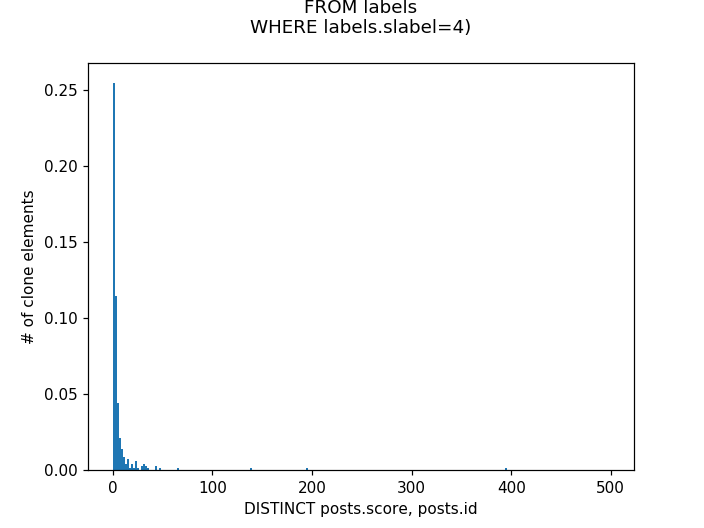

In [21]:
ax = plt.gca()
filter_str = """labels.slabel=2
AND labels.postid NOT IN (
SELECT DISTINCT postid
FROM labels
WHERE labels.slabel=4)
"""
plot_hist(ax, "DISTINCT posts.score, posts.id", filter_str, 
          bins=range(0,500, 2), density=True)

<IPython.core.display.Javascript object>


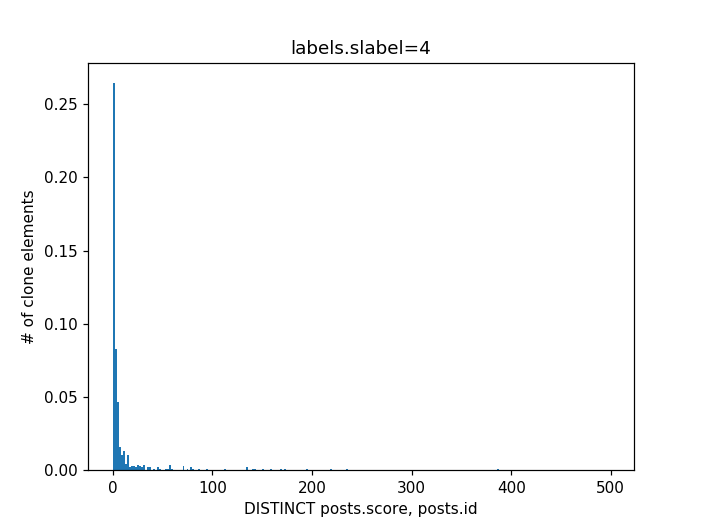

In [22]:
ax = plt.gca()
filter_str = """labels.slabel=4"""
plot_hist(ax, "DISTINCT posts.score, posts.id", filter_str, 
          bins=range(0,500, 2), density=True)

<IPython.core.display.Javascript object>


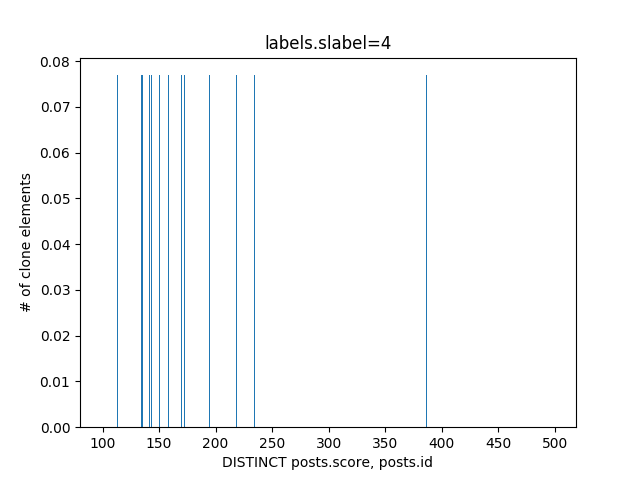

In [95]:
ax = plt.gca()
plot_hist(ax, "DISTINCT posts.score, posts.id", "labels.slabel=4", bins=range(100,500,1), density=True)

<IPython.core.display.Javascript object>


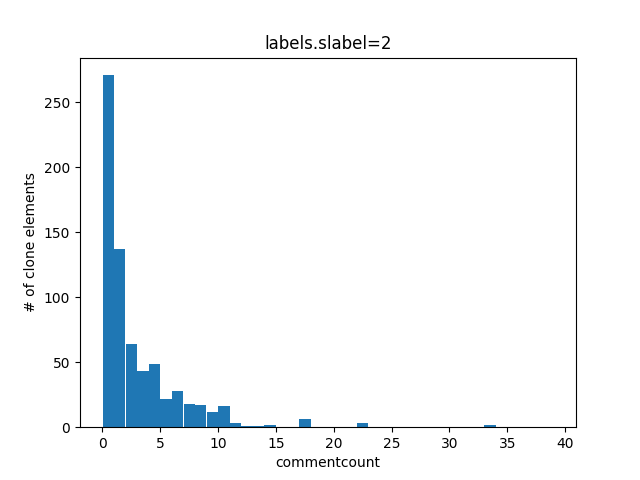

In [97]:
ax = plt.gca()
plot_hist_commentcount(ax, "labels.slabel=2", bins=range(0,40,1))

<IPython.core.display.Javascript object>


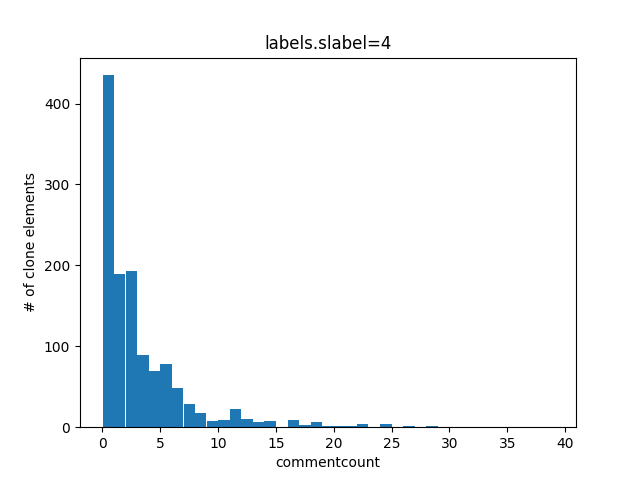

In [98]:
ax = plt.gca()
plot_hist_commentcount(ax, "labels.slabel=4", bins=range(0,40,1))

<IPython.core.display.Javascript object>


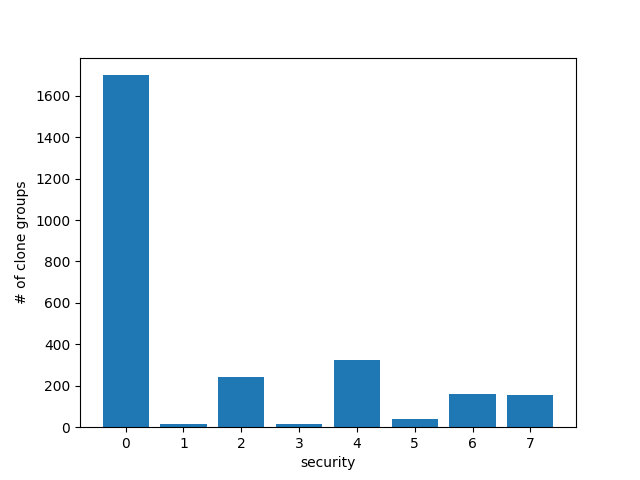

In [282]:
ax = plt.gca()
plot_n_groups_vs_slabel(ax, range(0,8))

<IPython.core.display.Javascript object>


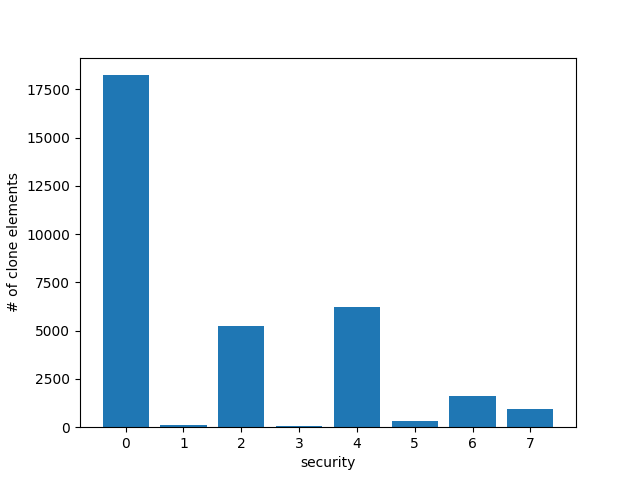

In [284]:
ax = plt.gca()
plot_n_elements_vs_slabel(ax, range(0,8))

<IPython.core.display.Javascript object>


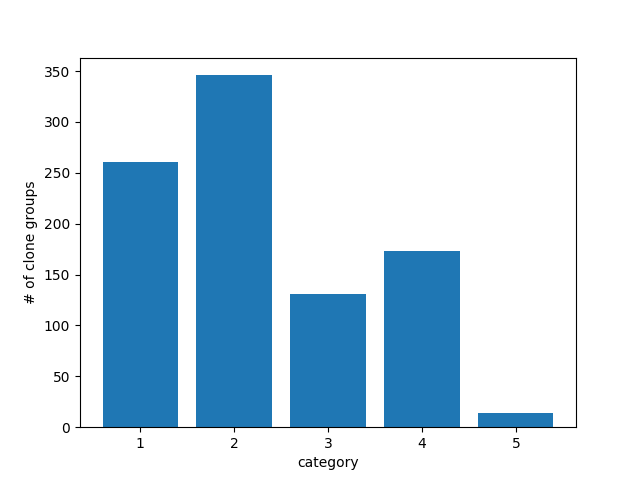

In [233]:
ax = plt.gca()
plot_n_groups_vs_scategory(ax)

<IPython.core.display.Javascript object>


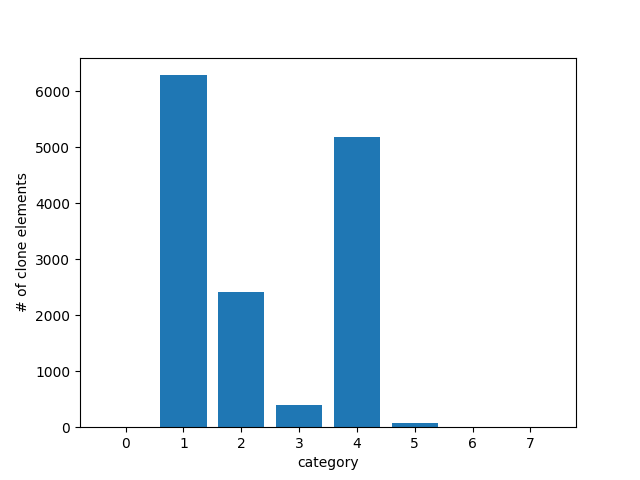

In [283]:
ax = plt.gca()
plot_n_elements_vs_scategory(ax)

In [133]:
def select_cids(tb_name_suffix, filterstr, connect_str):
    """Example filterstr: p.code0 LIKE '%.setSeed%'"""
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        #sql = """SELECT DISTINCT cid FROM clone_pairs_%s %s ORDER BY cid""" % (tb_name_suffix, filterstr)
        #filterstr = 'AND '+filterstr if filterstr != '' else ''
        sql = """SELECT DISTINCT p.cid, p.code0
FROM labels 
INNER JOIN clone_pairs_%s p
ON labels.postid  = p.postid0
  AND labels.indx = p.indx0
  AND labels.tbegin = p.tbegin0
  AND labels.tend = p.tend0
WHERE %s
;
""" % (tb_name_suffix, filterstr)
        cursor.execute(sql)
        rows = cursor.fetchall()
        cids = [row[0] for row in rows]
        return cids    

## Neo4j

In [386]:
import py.clones as clones
import py.cgraph as cgraph

importlib.reload(cgraph)

<module 'py.cgraph' from '/home/mschen/code/nbooks/py/cgraph.py'>

In [438]:
filter_str = """cid<6000 AND slabel = 4"""
cgraph.clear_all()
cgraph.create_cid_nodes(filter_str)

In [439]:
cgraph.create_answer_nodes(filter_str)

In [440]:
cgraph.create_snippet_nodes(filter_str)

In [441]:
cgraph.create_instance_nodes(filter_str)

In [442]:
clones.ClnClss(5438)

Clone group cid: 5438, containing 27 clone elements=========
----1/27----
http://stackoverflow.com/questions/11194217




```java
        MySSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(MySSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----2/27----
http://stackoverflow.com/questions/43846839




```java
            MySSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);
            return new DefaultHttpClient(ccm, params);
```


----3/27----
http://stackoverflow.com/questions/4837230




```java
        MySSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----4/27----
http://stackoverflow.com/questions/12534921




```java
            SSLSocketFactory sf = new CSRSSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

            return new DefaultHttpClient(ccm, params);
```


----5/27----
http://stackoverflow.com/questions/31310087




```java
                        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
                        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

                        HttpParams params = new BasicHttpParams();
                        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
                        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

                        SchemeRegistry registry = new SchemeRegistry();
                        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
                        registry.register(new Scheme("https", sf, 443));

                        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

                        return new DefaultHttpClient(ccm, params);
```


----6/27----
http://stackoverflow.com/questions/26804009




```java
            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

            return new DefaultHttpClient(ccm, params);
```


----7/27----
http://stackoverflow.com/questions/28233537




```java
            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

            return new DefaultHttpClient(ccm, params);
```


----8/27----
http://stackoverflow.com/questions/15157327




```java
            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory
                    .getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(
                    params, registry);

            return new DefaultHttpClient(ccm, params);
```


----9/27----
http://stackoverflow.com/questions/18371429




```java
            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory
                    .getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(
                    params, registry);

            return new DefaultHttpClient(ccm, params);
```


----10/27----
http://stackoverflow.com/questions/15843381




```java
            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory
                    .getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));



            ClientConnectionManager ccm = new ThreadSafeClientConnManager(
                    params, registry);

            return new DefaultHttpClient(ccm, params);
```


----11/27----
http://stackoverflow.com/questions/15878972




```java
            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory
                    .getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));



            ClientConnectionManager ccm = new ThreadSafeClientConnManager(
                    params, registry);

            return new DefaultHttpClient(ccm, params);
```


----12/27----
http://stackoverflow.com/questions/24013606




```java
         SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
         sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

         HttpParams params = new BasicHttpParams();
         HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
         HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

         SchemeRegistry registry = new SchemeRegistry();
         registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
         registry.register(new Scheme("https", sf, 443));

         ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

         return new DefaultHttpClient(ccm, params);
```


----13/27----
http://stackoverflow.com/questions/20989370




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);
        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);
        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);

```


----14/27----
http://stackoverflow.com/questions/14276261




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);
        return new DefaultHttpClient(ccm, params);
```


----15/27----
http://stackoverflow.com/questions/8223757




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----16/27----
http://stackoverflow.com/questions/11293498




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----17/27----
http://stackoverflow.com/questions/16508187




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----18/27----
http://stackoverflow.com/questions/16734015




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----19/27----
http://stackoverflow.com/questions/17702591




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----20/27----
http://stackoverflow.com/questions/25418908




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----21/27----
http://stackoverflow.com/questions/27706920




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----22/27----
http://stackoverflow.com/questions/27841164




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----23/27----
http://stackoverflow.com/questions/13812958




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);

```


----24/27----
http://stackoverflow.com/questions/10725268




```java
       SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
       sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

       HttpParams params = new BasicHttpParams();
       HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
       HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

       SchemeRegistry registry = new SchemeRegistry();
       registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
       registry.register(new Scheme("https", sf, 443));

       ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

       return new DefaultHttpClient(ccm, params);
```


----25/27----
http://stackoverflow.com/questions/23893399




```java
 SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
 sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

 HttpParams params = new BasicHttpParams();
 HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
 HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

 SchemeRegistry registry = new SchemeRegistry();
 registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
 registry.register(new Scheme("https", sf, 443));

 ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

 return new DefaultHttpClient(ccm, params);
```


----26/27----
http://stackoverflow.com/questions/27513829




```java
        SSLSocketFactory sf = new RecorridoSSL(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----27/27----
http://stackoverflow.com/questions/24594974




```java
        SSLSocketFactory sf = new TrustSSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory
                .getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(
                params, registry);

        return new DefaultHttpClient(ccm, params);

```


(4, 1, 'allow all hosts', '')


In [ ]:
def import_from_combined_view(tb_name_suffix, connect_str):
    slabel_postid = np.loadtxt("combined_view.csv", delimiter=',', skiprows=1)
    cids = set()
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        for i in range(len(slabel_postid)):
            slabel = slabel_postid[i][0]
            postid = slabel_postid[i][1]   
            sql = """SELECT DISTINCT cid FROM clone_pairs_%s WHERE postid0=%d""" % (tb_name_suffix, postid)
            print(sql)
            cursor.execute(sql)
            rows = cursor.fetchall()
            if len(rows) == 1:
                cid = rows[0][0]
                cids.add(cid)
                #label_sql = """INSERT INTO labels_%s(cid, slabel) VALUES(%d, %d) ON CONFLICT(cid) DO UPDATE
#SET (cid, slabel) = (%d, %d);""" % (tb_name_suffix, cid, slabel, cid, slabel)
                #cursor.execute(label_sql)
            elif len(rows) >1:
                print("\n\n\n**************************")
                print("postid %d has %d clone groups" % (postid, len(rows)))
                print("please help to label the following:")
                cids = [row[0] for row in rows]
                label_ui(tb_name_suffix, cids, connect_str)
    print("%d snippets in combined view, they belong to %d clones groups in clone_pairs" 
           % (len(slabel_postid), len(cids)))